In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
from diagram_estimations import draw_mm_diagrams, draw_mle_diagrams, draw_ls_diagrams, draw_hist_kde

df_sampled = pd.read_csv('./data/FW_Veg_Rem_Combined.csv')

cont_columns_prefix = ['Prec_pre_', "Temp_pre_", "Wind_pre_", "Hum_pre_"]
columns_suffix = [7, 15, 30]

weather_columns = [ x + str(y) for x in cont_columns_prefix for y in columns_suffix]

def preprocess_missing_weather_data(df):
    df_subsample = df[df['Temp_pre_7'] == -1]
    df_clean = df[df['Temp_pre_7'] != -1]
    mean_weather_data = df_clean.groupby(['state', 'discovery_month'])[weather_columns].mean().reset_index()
    df_subsample.drop(weather_columns, axis=1, inplace=True)
    df_subsample = df_subsample.merge(mean_weather_data)
    df_clean = df_clean.append(df_subsample, ignore_index=True)
    return df_clean

df_sampled = preprocess_missing_weather_data(df_sampled)

property = 'Temp_pre_7'

s_c = 'ALL'

kernel = gaussian_kde(df_sampled[property])
min_amount, max_amount = df_sampled[property].min(), df_sampled[property].max()

print(f'min value: {min_amount}; max value: {max_amount}')

min value: -20.84610422; max value: 55.0


/home/patrik-sh/Documents/ITMO_Classes/Multivariate/tasks/Task1/venv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


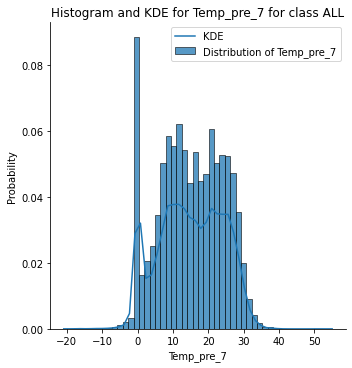

In [2]:
x = np.linspace(min_amount, max_amount, num=50)
kde_values = kernel(x)

draw_hist_kde(df_sampled, x, s_c, property, kde_values, 50)

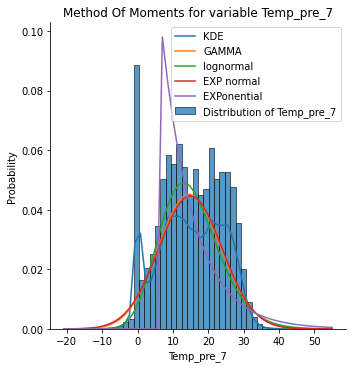

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9573399666267108, pvalue=6.340004103323345e-69), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=14.632642257417725, pvalue=1.1647852682372672e-09)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9805275750606318, pvalue=5.9160511106455614e-86), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=15.718468019509034, pvalue=4.196995639915713e-09)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9526016092930419, pvalue=1.228032396599441e-66), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=14.417110706081285, pvalue=8.986663635468517e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


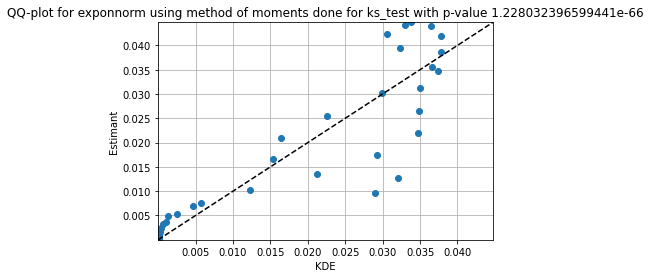

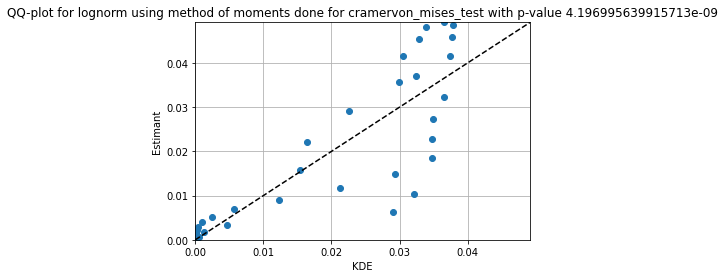

In [3]:
draw_mm_diagrams(df_sampled, x, s_c, property, kde_values, 50)

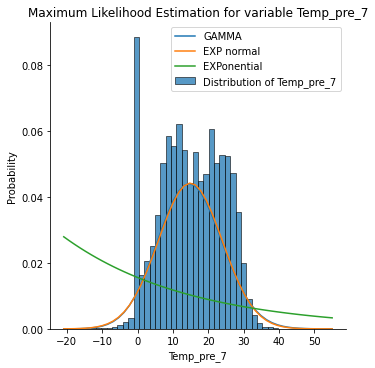

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9520390228757127, pvalue=2.2152927385134223e-66), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=14.391927721472477, pvalue=8.714029497980391e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.950506637276006, pvalue=1.067525117726005e-65), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=14.322645376497135, pvalue=8.001470597207572e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=0.5576257283381906, pvalue=3.6279894117001815e-15), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=4.328695353047767, pvalue=0)


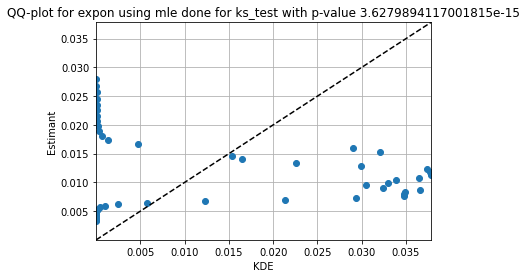

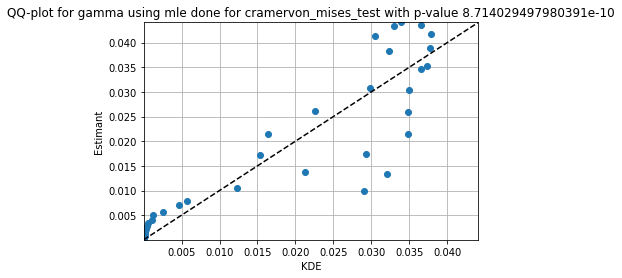

In [4]:
draw_mle_diagrams(df_sampled, x, s_c, property, kde_values, 50)

[2.78307774e-03 1.52370931e+01 1.03821368e+01]
[ 7.01572963 29.99884811  9.01462791]


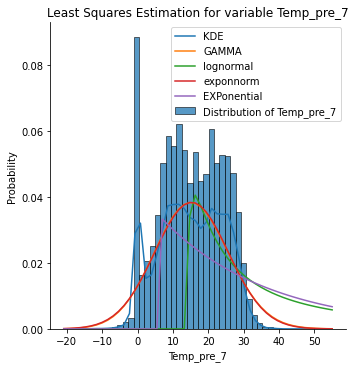

FOR gamma: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9315307226463552, pvalue=1.1907767844621783e-58), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=13.48641077213453, pvalue=2.668550935780445e-10)
FOR lognorm: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)
FOR exponnorm: Kolmogorov-Smirnoff test result KstestResult(statistic=0.9287792657753074, pvalue=8.53846274060251e-58), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=13.367980632139568, pvalue=2.2592216986083713e-10)
FOR expon: Kolmogorov-Smirnoff test result KstestResult(statistic=1.0, pvalue=0.0), whereas Omega squared test (Cramér–von Mises) test CramerVonMisesResult(statistic=16.666666666666664, pvalue=5.220809340400479e-10)


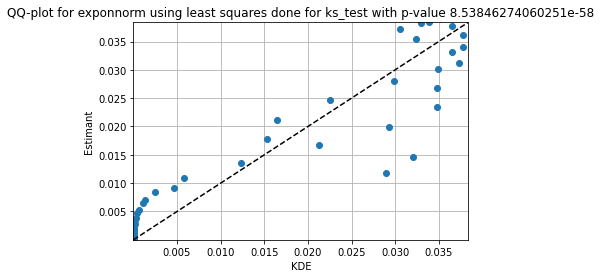

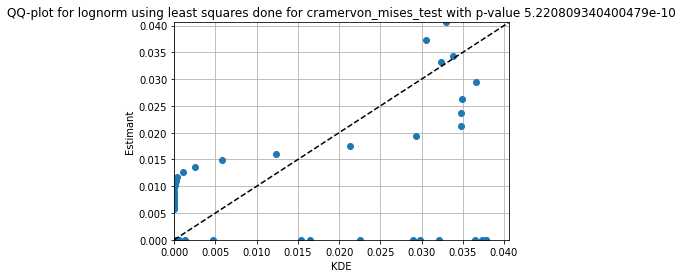

In [5]:
draw_ls_diagrams(df_sampled, x, s_c, property, kde_values, 50)

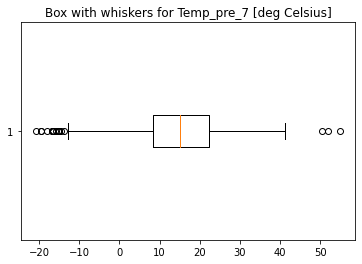

In [6]:
plt.boxplot(df_sampled[property], vert=False)
plt.title(f'Box with whiskers for {property} [deg Celsius]')
WHISKERS_FOLDER = './figures/whiskers/'
plt.savefig(f'{WHISKERS_FOLDER}whiskers_{property}_{s_c}.png')
plt.show()